In [1]:
import numpy as np ## numpy added because of array operations in homework

import pandas as pd## numpy added because of reading and writing csv or data files in homework

import matplotlib.pyplot as plt  # added for plotting of datas

from sklearn.preprocessing import StandardScaler  ## added for scaling the data 

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score ## added for measure the performance of classifiers

from sklearn.metrics import classification_report ## added for reporting performance result of classifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay ## added for visulization of data.

from sklearn.model_selection import train_test_split #added for preperation of input data for classification

from sklearn.neighbors import KNeighborsClassifier #added for classification

from sklearn.ensemble import RandomForestClassifier  #added for classification

from sklearn.svm import SVC  #added for classification

pd.options.mode.chained_assignment = None   #prevent SettingWithCopyWarning

In [2]:
import os
os.getcwd()

'C:\\Users\\denizde\\Desktop'

In [3]:
dataset = pd.read_csv("C:\\Users\\denizde\\Desktop\\projealldata.csv")

In [4]:
dataset.head(10) 

,ID,agv_no,koordinat_x,koordinat_y,gorev_adi,zaman
0,4.0,152,139912,24043,1B/SON MONTAJ/3,2021-11-01 16:51:42.590
1,9.0,122,146621,23992,1B/SON MONTAJ/3,2021-11-01 16:51:44.003
2,11.0,152,139911,24049,1B/SON MONTAJ/3,2021-11-01 16:51:45.400
3,15.0,152,139912,24047,1B/SON MONTAJ/3,2021-11-01 16:51:47.057
4,20.0,143,179745,107318,Görev Bekleniyor,2021-11-01 16:51:47.907
5,21.0,122,146623,23994,1B/SON MONTAJ/3,2021-11-01 16:51:48.070
6,28.0,144,191007,110493,2A/FINAL/1,2021-11-01 16:51:48.800
7,32.0,122,146618,23992,1B/SON MONTAJ/3,2021-11-01 16:51:48.877
8,36.0,152,139911,24043,1B/SON MONTAJ/3,2021-11-01 16:51:49.127
9,46.0,152,139914,24045,1B/SON MONTAJ/3,2021-11-01 16:51:49.907


In [5]:
dataset["gorev_adi"].value_counts()

1B/SON MONTAJ/3              365350
2A/FINAL/1                   344228
Görev Bekleniyor             278075
Kalite Lab. Gorev Bekleme    260105
2/B/FINAL/1-2                189015
1/A/SON MONTAJ/2             163814
2/B/SON MONTAJ/2             156354
1/A/SON MONTAJ/3             145491
1B/SON MONTAJ/2              142608
Final 1a                      89985
3/A/SON MONTAJ/2              80848
2A/SON MONTAJ/2               57983
Final 3b                      43671
Kalite Lab.                   38770
3/B/SON MONTAJ/2              37270
2/B/SON MONTAJ/1              27440
1/A/SON MONTAJ/4              16747
3/B/FINAL/1                   16593
2A/SON MONTAJ/1               13163
1B/SON MONTAJ/4               10403
1/A/SON MONTAJ/1               7823
2A/SON MONTAJ/3                7477
1B/SON MONTAJ/1                7415
2/B/SON MONTAJ/3               6096
2/B/SON MONTAJ/4               5888
1B//FINAL                      4355
2A/FINAL/2                     3692
3/B/SON MONTAJ/3            

In [6]:
dataset = dataset[~dataset.gorev_adi.str.contains("Görev Bekleniyor")]
dataset = dataset[~dataset.gorev_adi.str.contains("Kalite Lab. Gorev Bekleme")]
dataset = dataset[~dataset.gorev_adi.str.contains("Final 1a")]
dataset = dataset[~dataset.gorev_adi.str.contains("Final 3b")]
dataset = dataset[~dataset.gorev_adi.str.contains("Kalite Lab.")]
dataset = dataset[~dataset.gorev_adi.str.contains("BUHAR KABI")]
dataset = dataset[~dataset.gorev_adi.str.contains("AKU SARJ ISTASYONU")]

In [7]:
dataset["gorev_adi"].value_counts()

1B/SON MONTAJ/3     365350
2A/FINAL/1          344228
2/B/FINAL/1-2       189015
1/A/SON MONTAJ/2    163814
2/B/SON MONTAJ/2    156354
1/A/SON MONTAJ/3    145491
1B/SON MONTAJ/2     142608
3/A/SON MONTAJ/2     80848
2A/SON MONTAJ/2      57983
3/B/SON MONTAJ/2     37270
2/B/SON MONTAJ/1     27440
1/A/SON MONTAJ/4     16747
3/B/FINAL/1          16593
2A/SON MONTAJ/1      13163
1B/SON MONTAJ/4      10403
1/A/SON MONTAJ/1      7823
2A/SON MONTAJ/3       7477
1B/SON MONTAJ/1       7415
2/B/SON MONTAJ/3      6096
2/B/SON MONTAJ/4      5888
1B//FINAL             4355
2A/FINAL/2            3692
3/B/SON MONTAJ/3      1937
1/A/FINAL/1            980
2A/SON MONTAJ/4        913
3/A/SON MONTAJ/3       711
3/B/SON MONTAJ/1       551
3/A/SON MONTAJ/1       449
3/A/SON MONTAJ/4       263
Name: gorev_adi, dtype: int64

In [8]:
dataset["gorev_adi"] = dataset["gorev_adi"].str[0:3]

In [9]:
dataset["gorev_adi"].value_counts()

1B/    530131
2A/    427456
2/B    384793
1/A    334855
3/A     82271
3/B     56351
Name: gorev_adi, dtype: int64

In [10]:
dataset["gorev_adi"] = dataset["gorev_adi"].str.replace('/', '')

In [11]:
dataset["gorev_adi"] = dataset["gorev_adi"].str.replace('A', '0')

In [12]:
dataset["gorev_adi"] = dataset["gorev_adi"].str.replace('B', '1')

In [13]:
dataset["gorev_adi"].value_counts()

11    530131
20    427456
21    384793
10    334855
30     82271
31     56351
Name: gorev_adi, dtype: int64

In [14]:
dataset.drop(["ID"], axis = 1, inplace = True)
dataset.drop(["agv_no"], axis = 1, inplace = True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,:], dataset.iloc[:,2], test_size = 0.3, random_state = 42)

In [16]:
X_test.isnull().values.any()

False

In [17]:
X_train.isnull().values.any()

False

In [18]:
y_test.isnull().values.any()

False

In [19]:
y_train.isnull().values.any()

False

In [20]:
X_train.shape

(1271099, 4)

In [21]:
X_test.shape

(544758, 4)

In [22]:
RegressionDataset=X_test.copy()

x_test=X_test.copy()

In [23]:
X_train.drop(["gorev_adi"], axis = 1, inplace = True)

In [24]:
x_test.drop(["gorev_adi"], axis = 1, inplace = True)

In [25]:
X_train.drop(["zaman"], axis = 1, inplace = True)
x_test.drop(["zaman"], axis = 1, inplace = True)

In [26]:
standardScaler = StandardScaler() #adding scaling lib.
standardScaler.fit(X_train)
standardScaler.fit(x_test) # fitting the values in X_train
X_train = standardScaler.transform(X_train) #changing the values with their standart deviation values
x_test = standardScaler.transform(x_test) #changing the values with their standart deviation values

In [27]:
X_train

array([[ 0.49308545,  1.55300548],
       [ 1.19471186,  0.1921274 ],
       [ 0.19142312,  1.55155828],
       ...,
       [ 0.6418761 , -0.66352805],
       [-1.35270357, -1.25051733],
       [-1.37640927, -0.64631243]])

In [28]:
knn=KNeighborsClassifier(n_neighbors=5, metric="euclidean", p=2)

knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [29]:
predictions=knn.predict(x_test)

In [30]:
knn.score(x_test,y_test)

0.7824134753413442

In [31]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy", accuracy_score(y_test, knn.predict(x_test)))
print("Recall", recall_score(y_test, knn.predict(x_test),average="micro"))
print("Precision", precision_score(y_test, knn.predict(x_test), average="micro"))
print("F1", f1_score(y_test, knn.predict(x_test),average="micro"))

Accuracy 0.7824134753413442
Recall 0.7824134753413442
Precision 0.7824134753413442
F1 0.7824134753413443


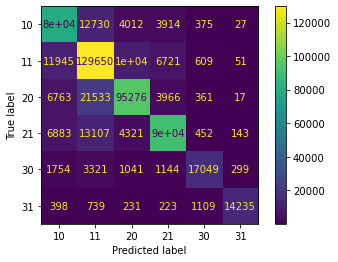

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, knn.predict(x_test))
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()

In [33]:
RegressionDataset.drop(["gorev_adi"], axis = 1, inplace = True)

In [34]:
RegressionDataset["gorev_adi"]=predictions


In [35]:
RegressionDataset.head(1)

,koordinat_x,koordinat_y,zaman,gorev_adi
355937,131426,4065,2021-11-03 01:33:47.050,10


In [36]:
RegressionDataset['month']=RegressionDataset['zaman'].str[5:7]
RegressionDataset['day']=RegressionDataset['zaman'].str[8:10]
RegressionDataset['hour']=RegressionDataset['zaman'].str[11:13]

In [37]:
RegressionDataset.head(1)

,koordinat_x,koordinat_y,zaman,gorev_adi,month,day,hour
355937,131426,4065,2021-11-03 01:33:47.050,10,11,03,01


In [38]:
RegressionDataset.drop(["koordinat_x"], axis = 1, inplace = True)
RegressionDataset.drop(["koordinat_y"], axis = 1, inplace = True)

In [39]:
RegressionDataset["hour"].value_counts()

09    28050
17    27771
21    26873
15    25284
23    25255
20    24907
14    24666
08    24415
01    24399
16    23897
11    23450
00    23264
07    22828
12    22425
10    22231
19    22190
02    21038
04    20417
06    19374
05    18874
18    18865
13    18701
22    17819
03    17765
Name: hour, dtype: int64

In [40]:
def AGVQuantity(gorevadi,regressiondata): 
    
    dataset=regressiondata
    gorev=gorevadi
    
    NewDataFrame["hour"]=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
    
    #dataset = dataset[dataset.day.str.contains(day)]
    dataset = dataset[dataset.gorev_adi.str.contains(gorevadi)]
    
    Monthmax=int(dataset["month"].max())
    Monthmin=int(dataset["month"].min())
    MonthDifference=int(Monthmax-Monthmin)
    
    if MonthDifference==0 : 
        MonthDifference=1
    
    resultf00=dataset.loc[(dataset["hour"]=='00') & (dataset["gorev_adi"]==gorev)]
    resultf01=dataset.loc[(dataset["hour"]=='01') & (dataset["gorev_adi"]==gorev)]
    resultf02=dataset.loc[(dataset["hour"]=='02') & (dataset["gorev_adi"]==gorev)]
    resultf03=dataset.loc[(dataset["hour"]=='03') & (dataset["gorev_adi"]==gorev)]
    resultf04=dataset.loc[(dataset["hour"]=='04') & (dataset["gorev_adi"]==gorev)]
    resultf05=dataset.loc[(dataset["hour"]=='05') & (dataset["gorev_adi"]==gorev)]
    resultf06=dataset.loc[(dataset["hour"]=='06') & (dataset["gorev_adi"]==gorev)]
    resultf07=dataset.loc[(dataset["hour"]=='07') & (dataset["gorev_adi"]==gorev)]
    resultf08=dataset.loc[(dataset["hour"]=='08') & (dataset["gorev_adi"]==gorev)]
    resultf09=dataset.loc[(dataset["hour"]=='09') & (dataset["gorev_adi"]==gorev)]
    resultf10=dataset.loc[(dataset["hour"]=='10') & (dataset["gorev_adi"]==gorev)]
    resultf11=dataset.loc[(dataset["hour"]=='11') & (dataset["gorev_adi"]==gorev)]
    resultf12=dataset.loc[(dataset["hour"]=='12') & (dataset["gorev_adi"]==gorev)]
    resultf13=dataset.loc[(dataset["hour"]=='13') & (dataset["gorev_adi"]==gorev)]
    resultf14=dataset.loc[(dataset["hour"]=='14') & (dataset["gorev_adi"]==gorev)]
    resultf15=dataset.loc[(dataset["hour"]=='15') & (dataset["gorev_adi"]==gorev)]
    resultf16=dataset.loc[(dataset["hour"]=='16') & (dataset["gorev_adi"]==gorev)]
    resultf17=dataset.loc[(dataset["hour"]=='17') & (dataset["gorev_adi"]==gorev)]
    resultf18=dataset.loc[(dataset["hour"]=='18') & (dataset["gorev_adi"]==gorev)]
    resultf19=dataset.loc[(dataset["hour"]=='19') & (dataset["gorev_adi"]==gorev)]
    resultf20=dataset.loc[(dataset["hour"]=='20') & (dataset["gorev_adi"]==gorev)]
    resultf21=dataset.loc[(dataset["hour"]=='21') & (dataset["gorev_adi"]==gorev)]
    resultf22=dataset.loc[(dataset["hour"]=='22') & (dataset["gorev_adi"]==gorev)]
    resultf23=dataset.loc[(dataset["hour"]=='23') & (dataset["gorev_adi"]==gorev)]
    
    NewDataFrame["AverageCount"]=[resultf00.shape[0]/MonthDifference,
                                  resultf01.shape[0]/MonthDifference,
                                  resultf02.shape[0]/MonthDifference,
                                  resultf03.shape[0]/MonthDifference,
                                  resultf04.shape[0]/MonthDifference,
                                  resultf05.shape[0]/MonthDifference,
                                  resultf06.shape[0]/MonthDifference,
                                  resultf07.shape[0]/MonthDifference,
                                  resultf08.shape[0]/MonthDifference,
                                  resultf09.shape[0]/MonthDifference,
                                  resultf10.shape[0]/MonthDifference,
                                  resultf11.shape[0]/MonthDifference,
                                  resultf12.shape[0]/MonthDifference,
                                  resultf13.shape[0]/MonthDifference,
                                  resultf14.shape[0]/MonthDifference,
                                  resultf15.shape[0]/MonthDifference,
                                  resultf16.shape[0]/MonthDifference,
                                  resultf17.shape[0]/MonthDifference,
                                  resultf18.shape[0]/MonthDifference,
                                  resultf19.shape[0]/MonthDifference,
                                  resultf20.shape[0]/MonthDifference,
                                  resultf21.shape[0]/MonthDifference,
                                  resultf22.shape[0]/MonthDifference,
                                  resultf23.shape[0]/MonthDifference]
    
    
    
    
    
    return NewDataFrame 

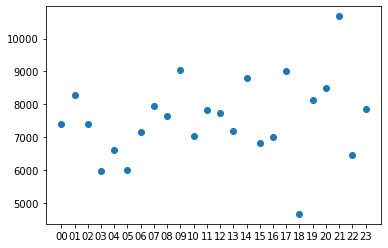

In [41]:
import matplotlib.pyplot
import matplotlib.dates

from datetime import time

NewDataFrame=pd.DataFrame()

NewDataFrame=(AGVQuantity("11",RegressionDataset))

x_values = NewDataFrame['hour']
y_values = NewDataFrame['AverageCount']


matplotlib.pyplot.plot_date(x_values, y_values)

In [42]:
x_values.shape

(24,)

In [43]:
y_values.shape

(24,)

In [44]:
x=x_values.tolist()
    
y=y_values.tolist()

In [45]:
x=list(map(int,x))

In [46]:
y=list(map(int,y))

In [47]:
from scipy import stats



In [48]:
slope, intercept, r, p, std_error=stats.linregress(x,y)

In [49]:
print(slope)

37.94521739130435


In [50]:
print(r) # correlation coeffient

0.2184974121761318


In [51]:
def myLinearFunction(x):
    return slope*x+intercept

In [52]:
myprediction=list(map(myLinearFunction,x))

In [53]:
myprediction

[7108.63,
 7146.575217391304,
 7184.520434782608,
 7222.465652173913,
 7260.410869565218,
 7298.356086956522,
 7336.301304347826,
 7374.246521739131,
 7412.191739130435,
 7450.136956521739,
 7488.082173913043,
 7526.0273913043475,
 7563.9726086956525,
 7601.917826086957,
 7639.863043478261,
 7677.808260869565,
 7715.75347826087,
 7753.698695652174,
 7791.643913043478,
 7829.589130434782,
 7867.5343478260875,
 7905.479565217392,
 7943.424782608696,
 7981.37]

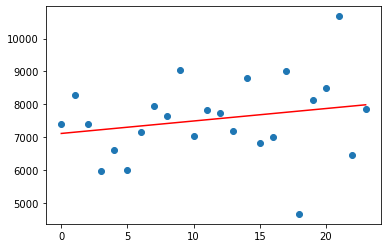

In [54]:
plt.scatter(x,y)
plt.plot(x,myprediction, color='red')
plt.show()

In [55]:
myLinearFunction(5)

7298.356086956522